## Convolutional Autoencoder

In this notebook, we will be implementing a simple Autoencoder for images. Autoencoders are a type of neural networks that learn the features from the data by compressing the data and then reproducing the output same as input. 

### Architecture:

***Input Data  =>  Encoder  => Hidden Layer  =>   Decoder  =>  Output Data***

Note that the Input Data == Output Data.

The number of nerons in the Input Layer i.e. Encoder == number of neurons in Output Layer i.e. Decoder.

The hidden layer is where the magic happens. The hidden layer may have the number of neurons that might be less than the Output Layer (i.e. "Undercomplete Autoencoder") or if the number of neurons are more in the Hidden layer than the Output Layer (i.e. "Overcomplete Autoencoder").

The Encoder for a Convolutional Autoencoder uses Convolution layers instead of the Fully Connected Layers as in the linear Autoencoder followed by MaxPooling layer. 

At the Hidden Layer, the model takes in the data from a higher dimension and compresses it into lower dimension by learning features from the Input Data.

Once the features are learnt, the data moves to the Decoder part which uses Transposed Convolutions along with Maxpooling to get the final image equal to the size of the Input Image. Sometimes, during the decoding process, the image gets blurry or appears in form of blocks. So, to avoid that, we use Upsampling.

In [7]:
# Import Dependencies
import numpy as np
from mnist_loader import fashion_MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Load Dataset
from tensorflow.python.keras.datasets import fashion_mnist
fashion_mnist

ImportError: cannot import name 'fashion_mnist'

In [3]:
# Shapes of training set
print("Training set (images) shape: ",fashion_mnist.train.images.shape)
print("Training set (labels) shape: ",fashion_mnist.train.labels.shape)

# Shapes of test set
print("Test set (images) shape: ", fashion_mnist.test.images.shape)
print("Test set (labels) shape: ", fashion_mnist.test.labels.shape)

Training set (images) shape:  (55000, 784)
Training set (labels) shape:  (55000, 10)
Test set (images) shape:  (10000, 784)
Test set (labels) shape:  (10000, 10)


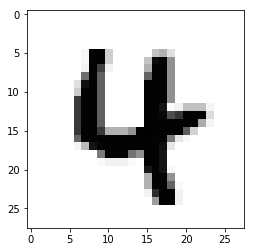

In [4]:
# Plot Random Image
n = np.random.randint(0,55000,1)
plt.imshow(fashion_mnist.train.images[n].reshape(28,28), cmap='Greys')